[![Abrir en Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/ManuelEspejo/Machine-Learning-Bases/blob/main/notebooks/03_Aprendizaje-Por-Refuerzo.ipynb) 👈🏻​ **Pulsar para abrir en Colab​**

# ¿Cómo usar estos notebooks?

Si este es el primer notebook que abres en este repositorio, te recomiendo que antes leas el [Manual de uso de estos notebooks](https://github.com/ManuelEspejo/Machine-Learning-Bases/blob/main/docs/manual-notebooks.md) que he creado para que te familiarices con el proyecto y las distintas rutas que puedes seguir, luego puedes volver aquí y continuar.

En este notebook, vamos a profundizar en la **interpretabilidad de los modelos de IA**.

Por otra parte, si aún no has revisado el notebook "[00_Empieza-aquí.ipynb](https://github.com/ManuelEspejo/Machine-Learning-Bases/blob/main/notebooks/00_Empieza-aquí.ipynb)", te sugiero que le eches un vistazo primero para conocer los conceptos básicos. Pero si ya tienes una idea clara de los conceptos básicos y quieres pasar a la práctica, ¡estás en el lugar correcto!

# 04. Interpretabilidad de los Modelos

Cuando entrenamos modelos de Machine Learning, uno de los mayores desafíos no es solo que el modelo funcione bien, sino entender **cómo** y **por qué** toma sus decisiones. Este es el corazón de la interpretabilidad: poder responder a preguntas como *"¿por qué este modelo rechazó mi préstamo?"* o *"¿por qué dice que este tumor es maligno?"*.

## ¿Por qué es importante?

La interpretabilidad de los modelos no es solo un tema técnico, es una cuestión de confianza, responsabilidad y toma de decisiones éticas. Aquí te dejo tres razones principales por las que es crucial:

1. **Confianza en el modelo:** Si no entiendes cómo funciona un modelo, ¿cómo puedes confiar en él? Esto es especialmente importante en áreas críticas como la salud, las finanzas y la justicia, donde las decisiones tienen un impacto directo en la vida de las personas.

2. **Cumplimiento de normativas:** Cada vez más regulaciones exigen que los modelos de IA sean explicables, como el [GDPR en Europa](https://gdpr-info.eu/), que establece el "derecho a explicación" para decisiones automatizadas.

> **Recursos:** Si quieres saber más sobre el GDPR, te recomiendo explorar este [GPT personalizado](https://chatgpt.com/g/g-JvCAAqPCj-gdpr-expert), está muy bien construido.

3. **Impacto social y ético:** Un modelo opaco puede amplificar sesgos y tomar decisiones injustas. Por ejemplo, si un modelo de contratación favorece a un grupo sobre otro sin una justificación clara, estaríamos perpetuando desigualdades.

En resumen, la interpretabilidad no es solo un *"nice to have"*, es una necesidad fundamental en cualquier aplicación de IA que impacte el mundo real.


## ¿Qué vamos a ver?

En este notebook, nos sumergiremos en el fascinante mundo de la interpretabilidad y exploraremos cómo podemos explicar y justificar las decisiones de dos tipos de modelos muy diferentes: un **árbol de decisión** y una **red neuronal**.

Al final de este notebook, habrás aprendido:

- **Qué es la interpretabilidad y por qué importa**, con ejemplos del mundo real.  
- **Cómo entrenar y visualizar un árbol de decisión,** uno de los modelos más intuitivos.  
- **Cómo trabajar con redes neuronales y explorar su interpretabilidad,** utilizando herramientas como SHAP.  
- **La comparación entre ambos enfoques,** destacando los pros y los contras de cada uno.

La meta no es solo entender qué modelo funciona mejor, sino también aprender a tomar decisiones informadas sobre cuándo priorizar la interpretabilidad frente a la precisión.

**¿Listo para desentrañar las decisiones de tus modelos y convertirte en un maestro de la interpretabilidad?**

**¡Vamos allá! 🚀**

# Índice de Contenidos

```
1. Fundamentos de la Interpretabilidad
   1.1. Componentes clave de la interpretabilidad  
       1.1.1. Comprensibilidad  
       1.1.2. Trazabilidad  
       1.1.3. Generalización y robustez  
   1.2. Dimensiones de la interpretabilidad  
       1.2.1. Modelos intrínsecamente interpretables  
       1.2.2. Interpretabilidad post-hoc  
   1.3. Tradeoff: Interpretabilidad vs. Complejidad  
2. Árboles de decisión: Explorando un modelo interpretable (Ejercicio práctico)
   2.1. Carga y exploración del dataset (Breast Cancer Wisconsin)
   2.2. Entrenamiento del árbol de decisión
      2.2.1. Configuración y ajuste de hyperparámetros
      2.2.2. Visualización y análisis del árbol
   2.3. Análisis de la importancia de features
3. Redes neuronales: Desentrañando la "caja negra" (Ejercicio práctico)
   3.1. Construcción y entrenamiento de una red neuronal simple
   3.2. Métodos para interpretar redes neuronales
      3.2.1. Uso de SHAP para analizar la importancia de features
      3.2.2. Visualización de resultados y comparación con el árbol de decisión
4. Comparativa entre modelos: Árboles de decisión vs. Redes neuronales
   4.1. Precisión vs. Interpretabilidad
5. Conclusión
```

In [12]:
import os
import sys

# Configuraciones
# Detectar si estamos en Colab
in_colab = 'google.colab' in str(get_ipython())

if in_colab:
    # Descargar el archivo visualizations.py desde el repositorio de GitHub
    !mkdir -p /content/utils # Creamos una carpeta utils para que coincida con la estructura del repositorio
    !wget -O utils/visualizations.py "https://raw.githubusercontent.com/ManuelEspejo/Machine-Learning-Bases/main/utils/visualizations.py"
    data_dir = '/content/data' # Ruta de los datos
else:
    # Agregar el directorio raíz al path de Python (Para ejecutar en local)
    notebook_dir = os.path.dirname(os.path.abspath('__file__'))
    project_dir = os.path.dirname(notebook_dir)
    sys.path.append(project_dir)
    data_dir = '../data/raw'

In [13]:
# Importar las librerías necesarias
import os
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import shap
import tensorflow as tf
import tensorflow.experimental.numpy as tnp
from sklearn.datasets import load_breast_cancer
from sklearn.metrics import accuracy_score, classification_report
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier, plot_tree
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam


# Ajustes
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2'

# 1. Fundamentos de la Interpretabilidad

La interpretabilidad no es solo un tema técnico; es lo que conecta a las personas con los modelos. Es como tener un traductor entre el mundo de las matemáticas y el mundo real. Aquí exploraremos los pilares que hacen que un modelo sea interpretable y, lo más importante, entendible.

## 1.1. Componentes clave de la interpretabilidad

### 1.1.1. Comprensibilidad

La facilidad con la que un humano puede entender el funcionamiento interno de un modelo. Por ejemplo, un árbol de decisión es claro porque sigue una lógica "si esto, entonces aquello".

### 1.1.2. Trazabilidad

La capacidad de descomponer una predicción en sus partes para entender qué factores influyeron más. Es como seguir las huellas en la escena de un crímen para reconstruir lo que sucedió.

Por ejemplo, en un modelo médico que predice si un tumor es maligno, queremos saber: ¿Fue el tamaño del tumor? ¿Su forma? ¿La edad del paciente? ¿Todas las características?

Sin trazabilidad, usamos modelos ciegamente. No podemos aceptar un diagnóstico médico sin saber en qué se basó. Aplicar un modelo sin trazabilidad puede sonar extremo, pero es la realidad en muchos sistemas de IA actuales, se usan modelos que no sabemos cómo funcionan mucho más frecuentemente de lo que podrías imaginar.

### 1.1.3. Generalización y robustez

Una buena interpretabilidad no solo implica entender un modelo, sino también confiar en que su lógica se mantiene consistente ante nuevas situaciones.

El mundo no es estático, por lo que no queremos un modelo que sólo de buenos resultados en lo que ya ha visto, sino que sea capaz de aplicar su lógica a nuevas situaciones de manera efectiva y sin errores o fallos críticos.

Un modelo robusto debe ser consistente: Si sus decisiones se vuelven erráticas cuando los datos cambian ligeramente, la interpretabilidad pierde su valor.

En definitiva, queremos un modelo que sea capaz de salir de su "zona de confort" y adaptarse a lo que le venga.

## 1.2. Dimensiones de la interpretabilidad

### 1.2.1. Modelo intrínsecamente interpretables

Algunos modelos, como los árboles de decisión y las regresiones lineales, son interpretables por diseño. Su estructura lógica y directa hace que puedas explicarlos como si estuvieras contando una historia.

Te pongo un ejemplo: "Si el paciente tiene más de 50 años y su presión arterial es alta, hay un 80% de probabilidades de que tenga riesgo cardiovascular." Como ves, dos factores que influyen directamente en la variable a predecir.

El problema es que estos modelos a menudo no capturan toda la complejidad de los datos. Son buenos para hacerse una idea de la situación, pero pueden pasar por alto cosas importantes.

### 1.2.2. Interpretabilidad post-hoc

Aquí entran en juego herramientas como `SHAP` o `LIME`. Estas nos sirven para inspeccionar modelos más complejos y entender qué está pasando dentro. Por ejemplo, SHAP te dirá cuánto influyó cada feature en una predicción específica.

Esto sería como tener un panel de control para una máquina compleja. No entiendes todo el sistema, pero las herramientas te permiten ver qué está fallando o funcionando bien.


## 1.3. Tradeoff: Interpretabilidad vs. Complejidad

La vida es un constante balance entre simplicidad y detalle, y lo mismo ocurre con los modelos de Machine Learning. A menudo, enfrentamos el dilema de elegir entre un modelo simple y entendible o uno complejo y más potente y preciso.

Y, como habrás imaginado, no hay una respuesta o una regla que podamos aplicar a todos los casos: dependerá de la situación.

La clave está en decidir qué es más importante según el contexto. En medicina o justicia, probablemente prefieras un modelo más interpretable, incluso si pierdes algo de precisión. En cambio, en aplicaciones como recomendaciones de películas, podrías priorizar la precisión, porque no pasa nada si el modelo falla, de hecho, incluso puede ser divertido y enseñarte cosas que no sabías que te gustaban.

En definitiva, la interpretabilidad no es una meta en sí misma, sino un medio para llegar a decisiones más informadas y conscientes.

# 2. Árboles de decisión: Explorando un modelo interpretable (Ejercicio práctico)

Los árboles de decisión son un excelente punto de partida para entender la interpretabilidad en Machine Learning. Son simples, visuales y fáciles de explicar: como un diagrama de flujo que guía cada decisión basándose en reglas claras. Si quieres explicar cómo tu modelo llegó a una conclusión, un árbol de decisión te lo muestra de forma directa.

Estos árboles nos permiten:
1. Seguir cada decisión paso a paso.
2. Justificar las decisiones de manera clara y sencilla.
3. Son una base ideal para comparar con otros modelos más complejos, como las redes neuronales.

## 2.1. Carga y exploración del dataset (Breast Cancer Wisconsin)

Para comenzar, trabajaremos con el [Breast Cancer Wisconsin Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html), un conjunto de datos clásico en Machine Learning. Este dataset incluye mediciones médicas de tumores de mama y clasifica si son malignos o benignos.

> **Nota:** Este dataset está disponible en la librería `scikit-learn`, una de las más populares para Machine Learning en Python. Además de este, hay muchos otros más disponibles en [`sklearn.datasets`](https://scikit-learn.org/stable/api/sklearn.datasets.html).

Primero, cargaremos y exploraremos los datos:


In [14]:
# Cargar el dataset
data = load_breast_cancer()
df = pd.DataFrame(data.data, columns=data.feature_names)

# Añadir la columna objetivo (maligno o benigno)
df['target'] = data.target

# Ver las primeras filas del dataset
df.head()

,mean radius,mean texture,mean perimeter,mean area,mean smoothness,mean compactness,mean concavity,mean concave points,mean symmetry,mean fractal dimension,...,worst texture,worst perimeter,worst area,worst smoothness,worst compactness,worst concavity,worst concave points,worst symmetry,worst fractal dimension,target
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,0
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,0
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,0
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,0
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,0


Como podemos apreciar, este dataset contiene los siguientes datos:

- **features (Características):** Contiene 30 características numéricas que describen diferentes aspectos de los tumores, como el tamaño, la forma y la textura. Estas características se dividen en tres categorías principales:
  - *Promedios de medición*, como `mean radius` y `mean texture`.
  - *Errores estándar*, como `radius error` y `texture error`.
  - *Peores valores registrados*, como `worst radius` y `worst texture`.

Esta organización permite capturar tanto una descripción general del tumor como sus posibles irregularidades. Por ejemplo, un error alto en `concavity error` podría indicar bordes irregulares, una señal de malignidad.

- **target (Objetivo):** La columna objetivo indica si el tumor es maligno (`0`) o benigno (`1`).


Ahora, vamos a explorar rápidamente las características principales del dataset.

In [15]:
print(f"Cantidad de instancias: {df.shape[0]}")
print(f"Cantidad de features: {df.shape[1] - 1}")  # Restamos 1 porque 'target' no es feature
print("*"*100, "\n")
print(f"Conteo de las clases:\n{df['target'].value_counts()}") # Conteo de las clases
print("*"*100, "\n")
print(f"Datos faltantes:\n{df.isnull().sum()}")
print("*"*100, "\n")
print(f"Resumen estadístico:\n{df.describe()}") # Resumen estadístico

Cantidad de instancias: 569
Cantidad de features: 30
**************************************************************************************************** 

Conteo de las clases:
target
1    357
0    212
Name: count, dtype: int64
**************************************************************************************************** 

Datos faltantes:
mean radius                0
mean texture               0
mean perimeter             0
mean area                  0
mean smoothness            0
mean compactness           0
mean concavity             0
mean concave points        0
mean symmetry              0
mean fractal dimension     0
radius error               0
texture error              0
perimeter error            0
area error                 0
smoothness error           0
compactness error          0
concavity error            0
concave points error       0
symmetry error             0
fractal dimension error    0
worst radius               0
worst texture              0
worst perimet

Algunas cosas interesantes que podemos ver a simple vista:
- **Equilibrio de clases**: Hay más casos benignos que malignos, pero el desequilibrio no es extremo. Esto es bueno porque significa que el modelo no tendrá un sesgo inicial fuerte hacia una clase.
- **Tamaños de los tumores**: El mean radius varía entre ~6.98 y ~28.1. Esto sugiere que tenemos una gran variedad de tamaños de tumores.
- **Smoothness**: `mean smoothness` tiene un rango mucho más estrecho, lo que indica que los tumores tienden a ser consistentes en esta característica.
- **Valores extremos**: Las columnas `worst radius`, `worst texture` y `worst area` tienen valores más altos que sus contrapartes promedio, lo cual es lógico, ya que capturan los casos más extremos.
- **Datos faltantes**: No tenemos datos faltantes. Esto está genial. Tener un dataset limpio desde el principio facilita el análisis y la modelización. Esto no siempre ocurre en el mundo real, así que estamos en un buen punto de partida.

> **Reflexión:** Los valores promedio y "peores" nos dan un contexto interesante. Por ejemplo, un tumor con un `worst radius` significativamente mayor que su `mean radius` podría ser una señal de crecimiento irregular.


## 2.2. Entrenamiento del árbol de decisión

Ahora que entendemos nuestro dataset, es hora de dar el siguiente paso: entrenar un árbol de decisión para clasificar tumores como malignos o benignos. Como discutimos antes, este modelo es perfecto para nuestro caso porque no solo hace predicciones, sino que también nos permite entender por qué toma esas decisiones.



### 2.2.1.Configuración y ajuste de hyperparámetros

### 2.2.1. Configuración y ajuste de hyperparámetros

**¿Qué es un árbol de decisión?**

Un árbol de decisión es un modelo de aprendizaje automático que organiza su proceso de toma de decisiones como un diagrama de flujo. Funciona realizando preguntas sobre los datos, como: ¿el radio promedio de un tumor es mayor a 15?. En función de las respuestas ("sí" o "no"), los datos se dividen en grupos más pequeños.

El objetivo es repetir este proceso de división progresiva hasta que cada grupo sea lo suficientemente puro como para predecir la clase objetivo con confianza (por ejemplo, "benigno" o "maligno").

Podría decirse que un árbol de decisión funciona como el clásico juego de mesa "Quién es Quién", en el que vamos haciendo preguntas como "¿La persona tiene gafas? ¿Es pelirroja?..." Cada pregunta te permite eliminar opciones y acotar el grupo hasta llegar a un único resultado: "¡La sospechosa es Josefa, la mujer pelirroja con gafas de sol!".

De la misma manera, en un árbol de decisión cada pregunta corresponde a una condición que divide los datos, y las respuestas nos acercan más y más a la solución hasta que, al final del proceso, el modelo identifica la clase más probable en función de los datos disponibles: "¡El tumor es maligno!" Espera... ¿El tumor es maligno...?😐​ (en este caso, acertar que un tumor es maligno no sería tan divertido como acertar el sospechoso en el "Quién es Quién").

**Importancia de los hyperparámetros**

Antes de entrenar el árbol, es crucial entender los hyperparámetros clave:

- `max_depth`: Controla la profundidad del árbol. Un árbol muy profundo puede sobreajustarse a los datos (memorizalos en lugar de generalizar).
- `min_samples_split`: Número mínimo de muestras necesarias para dividir un nodo. Esto evita divisiones innecesarias.
- `criterion`: Define cómo se mide la calidad de una división. Usaremos "gini" para este ejemplo, que mide la pureza de los nodos.

Estos hyperparámetros nos permiten equilibrar la precisión del modelo y su simplicidad.

#### Entrenamiento del árbol de decisión

Vamos con el código para configurar y entrenar nuestro modelo:

In [16]:
# Dividir el dataset en conjuntos de entrenamiento y prueba
X = df.drop('target', axis=1)
y = df['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el árbol de decisión
clf = DecisionTreeClassifier(max_depth=4, random_state=42, criterion='gini')

# Entrenar el modelo
clf.fit(X_train, y_train)

# Hacer predicciones
y_pred = clf.predict(X_test)

# Evaluar precisión
accuracy = accuracy_score(y_test, y_pred)
print(f"Precisión del árbol de decisión: {accuracy*100:.2f}%")


Precisión del árbol de decisión: 94.74%


#### Reflexión sobre los resultados iniciales

- **Precisión:** Una precisión del 95% es impresionante para un modelo tan simple. Sin embargo, recuerda que la precisión no lo es todo. También es importante saber de dónde vienen las decisiones que toma el árbol, esto lo veremos más adelante.

- **Hyperparámetros:**
  - Usamos `max_depth=4` para limitar la profundidad del árbol y evitar sobreajuste.
  - El criterio `gini` nos asegura que los nodos sean lo más puros posible en términos de la clase objetivo.

> **Nota:** Un nodo "puro" contiene datos de una sola clase, como un grupo donde todos los tumores son benignos.

### 2.2.2. Visualización y análisis del árbol

Ahora vamos con lo que buscábamos desde el principio: Visualizar nuestro arbol para entender cómo toma las decisiones.

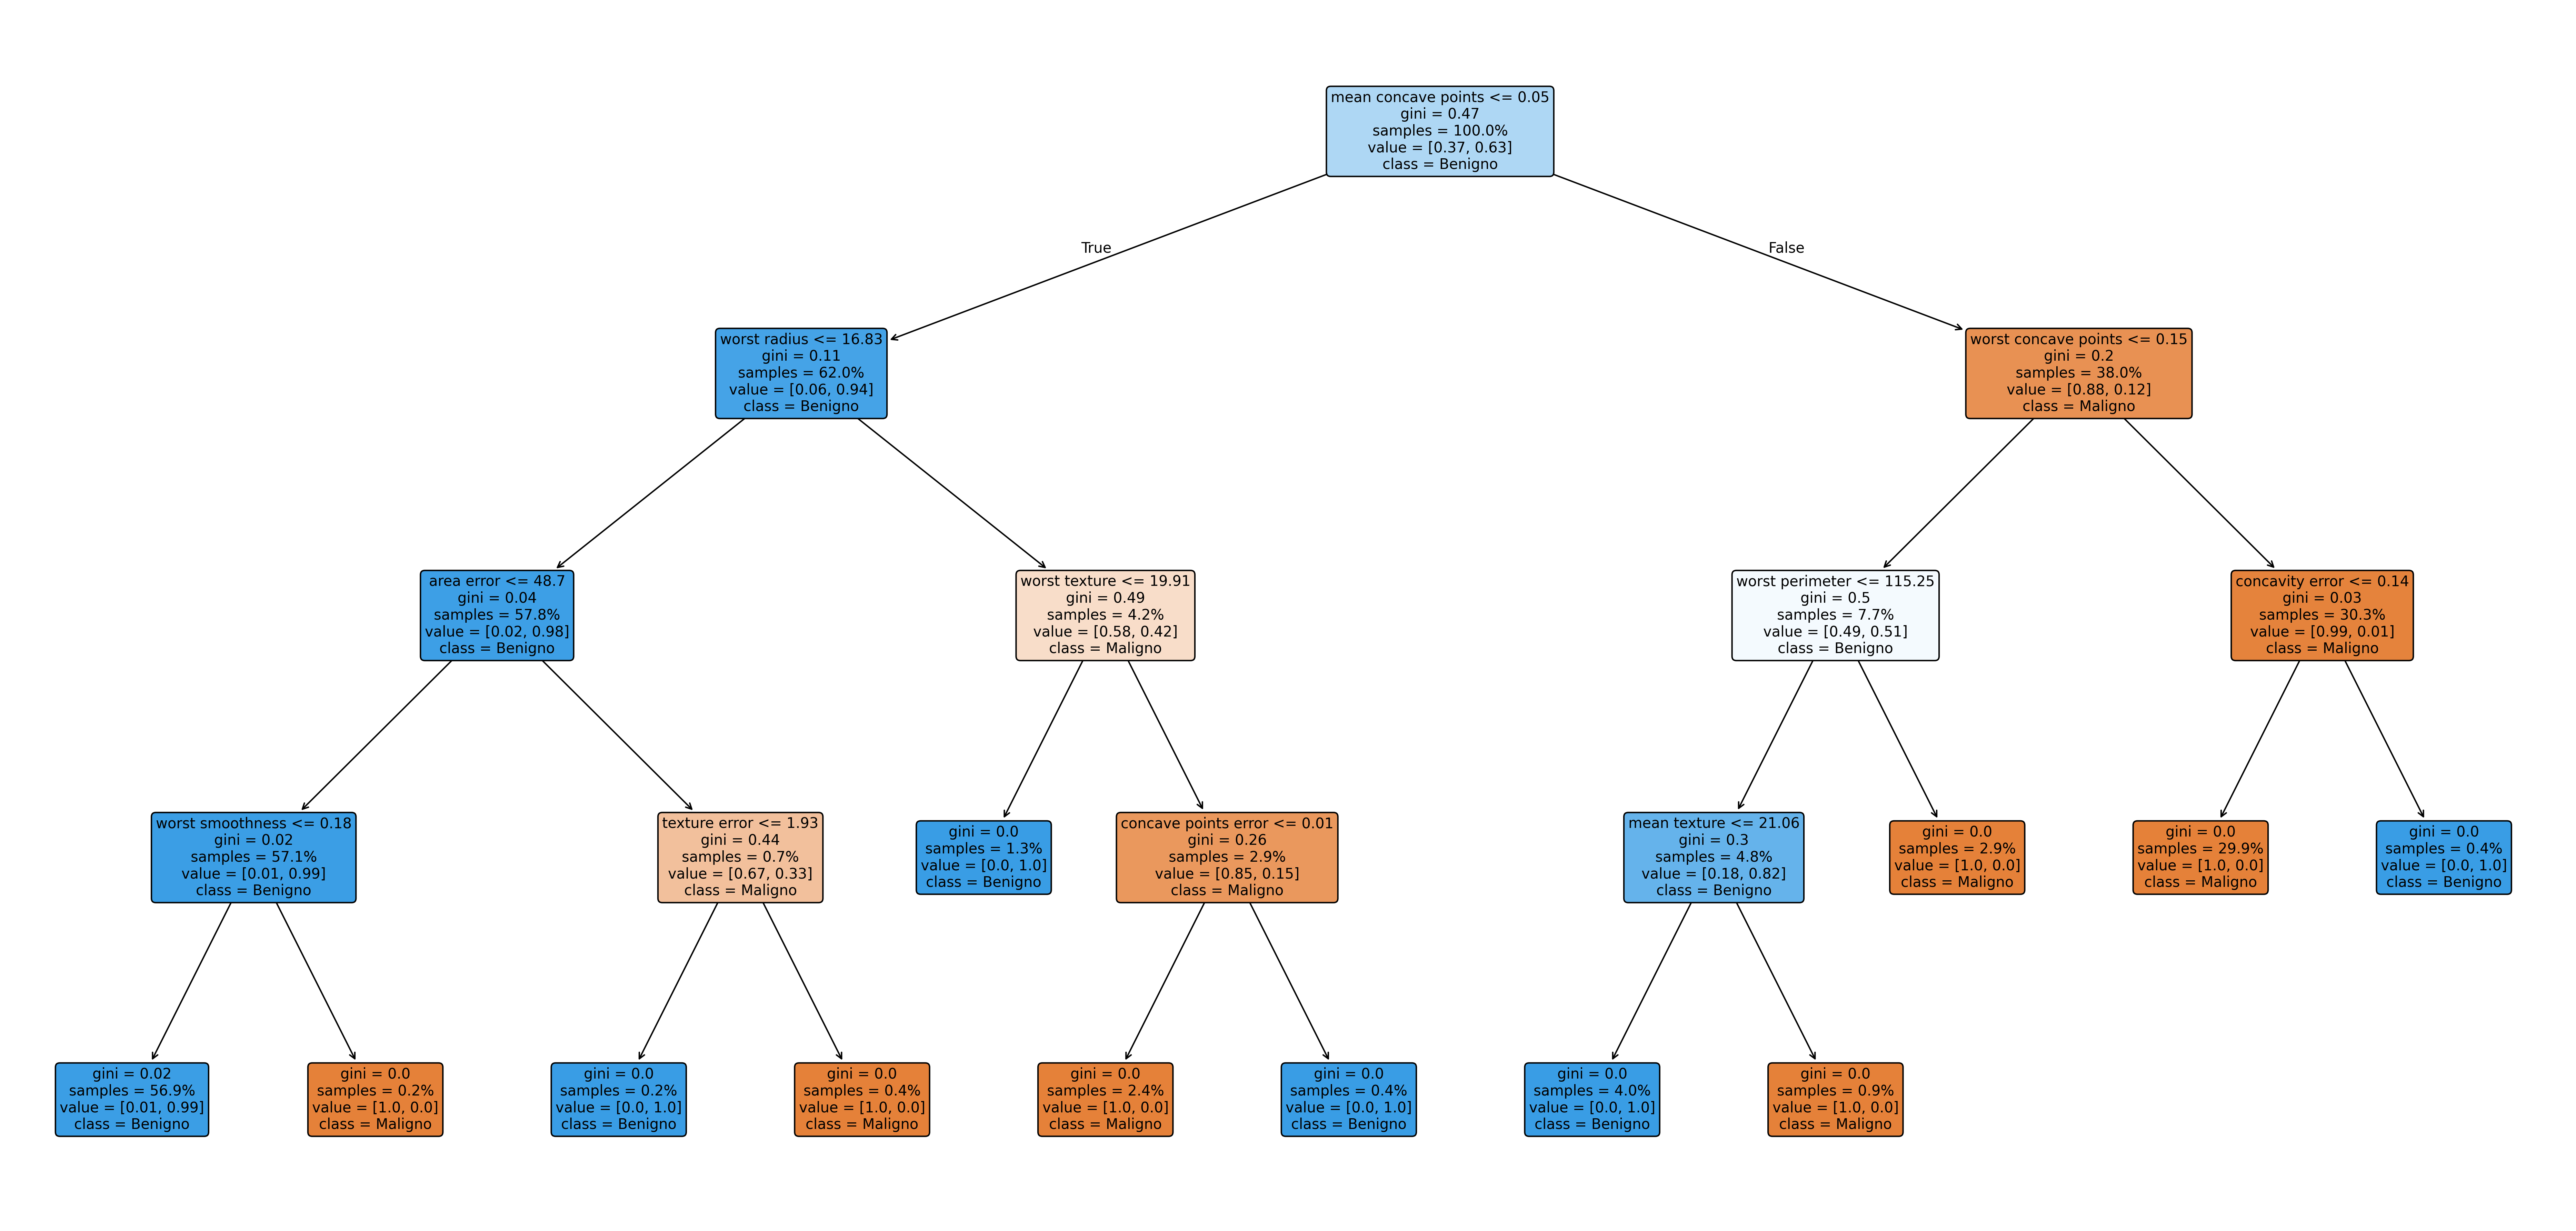

In [17]:
# Configurar el estilo de matplotlib
plt.style.use('default')

# Crear figura
plt.figure(figsize=(25,12), dpi=300)

# Visualizar el árbol
plot_tree(clf, 
    feature_names=X.columns,
    class_names=['Maligno', 'Benigno'],
    filled=True,
    rounded=True,  # Bordes redondeados
    fontsize=10,   # Tamaño de fuente más legible
    proportion=True,  # Mostrar proporciones en lugar de conteos
    precision=2)    # Reducir decimales mostrados

# Ajustar márgenes
plt.tight_layout()

## Descomenta esta línea para guardar la imagen en el directorio docs/imgs
#plt.savefig('../docs/imgs/IMG_arbol_decision.png', dpi=300, bbox_inches='tight')
plt.show()

> [Ver imagen del árbol de decisión](../docs/imgs/IMG_arbol_decision.png)

#### Análisis del árbol de decisión

Este árbol de decisión nos muestra cómo el modelo clasifica los tumores como malignos o benignos en base a las características del dataset. Vamos a analizarlo paso a paso:

> **Importante:** Te recomiendo que abras la imagen del árbol de decisión en una ventana separada mientras lees lo que sigue, para seguir mejor la explicación.

##### Nodo raíz (Inicio del árbol)

- El árbol comienza con la característica mean concave points, que parece ser la más importante según el criterio gini.
- La pregunta inicial es: **¿mean concave points <= 0.05?**
- Si la respuesta es sí, se mueve a la izquierda (más probable que el tumor sea benigno).
- Si la respuesta es no, se mueve a la derecha (más probable que el tumor sea maligno).

> **Nota:** Este nodo refleja que los tumores con un bajo número de puntos cóncavos tienden a ser benignos, lo cual tiene sentido porque los tumores malignos suelen tener bordes más irregulares.

##### Profundizando en las ramas

**Rama izquierda (benigno):**

- **Segundo nivel:** Si `mean concave points <= 0.05`, el árbol evalúa `worst radius` (otra métrica clave).
  - Si `worst radius <= 16.83`, el tumor sigue siendo benigno.
  - Si no, el árbol examina características adicionales como `area error` para refinar la clasificación.

En general, vemos que en esta rama los tumores benignos tienden a mantenerse con características menos extremas (e.g., menor radio, menor área).

- **Rama derecha (maligno):**
  - **Segundo nivel:** Si `mean concave points > 0.05`, el árbol pasa a evaluar `worst concave points`, una característica relacionada con la irregularidad de los bordes.
    - Si `worst concave points <= 0.15`, el modelo examina características como `worst perimeter` y `concavity error` para confirmar malignidad.
    - Esta rama se vuelve más compleja porque los tumores malignos suelen ser más variables.

> **Nota:** Las ramas terminales (hojas) tienen una "pureza" elevada, lo que significa que el árbol separa bien las clases en la mayoría de los casos.

##### Pureza de los nodos y el criterio Gini

El criterio gini mide la "impureza" de un nodo. Un nodo es puro si contiene datos de una sola clase (todo benigno o todo maligno).

En un nodo totalmente puro, el gini es 0. Esta pureza también podemos verla en la intensidad del color del nodo: cuanto más oscuro sea el color, más puro es el nodo, de este modo podemos ver de un vistazo rápido que tenemos un árbol bastante puro.

En el nodo raíz, el gini es más alto porque el modelo aún no separa completamente las clases.

A medida que descendemos por el árbol, el gini disminuye, indicando nodos más puros.

Las hojas (ramas finales) tienen un gini de 0 o cercano a 0, lo que significa que contienen datos mayoritariamente de una sola clase.

##### Conclusiones clave

Podemos llevarnos algunas conclusiones clave de estas observaciones:
- **Característica más importante:** `mean concave points`. Esto indica que la forma y la irregularidad de los bordes del tumor son un factor crítico para distinguir entre tumores malignos y benignos.
- **Ramas claras:** Los tumores benignos tienden a tener valores más bajos en características relacionadas con el tamaño y la irregularidad.
- **Balance entre simplicidad y precisión:** Aunque este árbol es relativamente simple (profundidad = 4), es capaz de capturar patrones importantes en los datos.

> **Nota:** Te animo a que pruebes a cambiar alguno de los hiperparámetros como la profundidad, para que veas cómo influye en el árbol, tanto en su precisión como en las decisiones que toma.

## 2.3. Análisis de la importancia de features

Después de visualizar y analizar el árbol de decisión, ahora nos enfocaremos en cuantificar la importancia de las features. Esto nos permitirá responder preguntas clave como: ¿qué características tienen más peso a la hora de clasificar los tumores?

#### ¿Qué es la importancia de las features?

En un árbol de decisión, la importancia de una feature se calcula en base a cuántas veces y cuán temprano en el árbol se utiliza para dividir los datos. Cuanto más contribuye una feature a reducir la impureza (gini) en los nodos, mayor será su importancia.

> **Ejemplo práctico:** Si `mean concave points` aparece en el nodo raíz y se utiliza en múltiples niveles para dividir los datos, tendrá una importancia mayor que una feature que aparece solo en una hoja.

#### Obteniendo la importancia de las features

Usamos el método `feature_importances_` de sklearn para extraer esta información:

In [18]:
# Obtener la importancia de las features
importances = clf.feature_importances_

# Crear un dataframe para organizar los resultados
feature_importances = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False)

# Mostrar las 10 features más importantes
print(feature_importances.head(10))

                 Feature  Importance
7    mean concave points    0.704583
27  worst concave points    0.066901
20          worst radius    0.053295
22       worst perimeter    0.052474
1           mean texture    0.031395
21         worst texture    0.028196
16       concavity error    0.018908
17  concave points error    0.016234
13            area error    0.012211
24      worst smoothness    0.009409


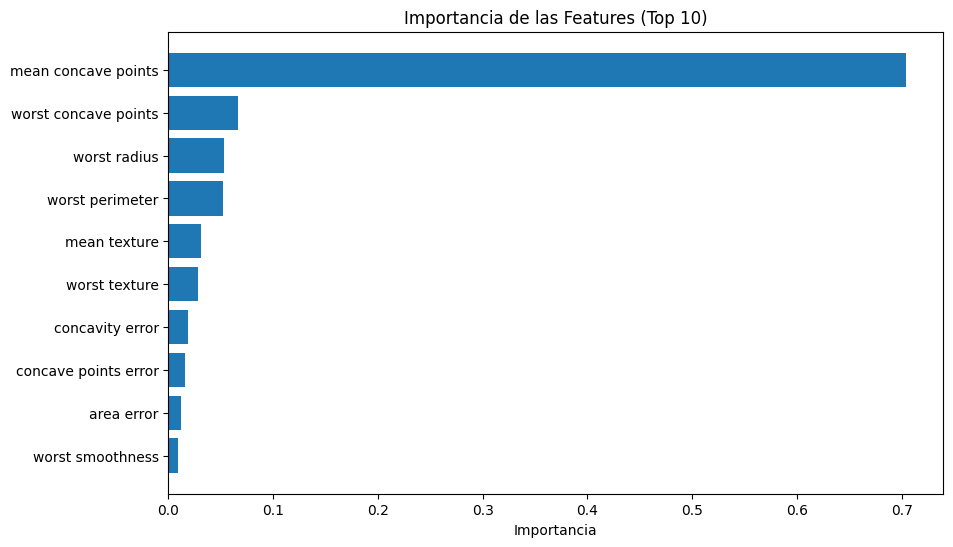

In [19]:
# Visualización de las 10 features más importantes
plt.figure(figsize=(10, 6))
plt.barh(feature_importances['Feature'][:10], feature_importances['Importance'][:10])
plt.gca().invert_yaxis()
plt.xlabel('Importancia')
plt.title('Importancia de las Features (Top 10)')
plt.show()

#### Análisis de la importancia de las features

**Feature más importante:** `mean concave points`
- *Importancia:* 0.704 (70.5% del peso total).

Esto confirma que la forma de los bordes del tumor (medida por los puntos cóncavos) es el factor más decisivo para el modelo. Los tumores malignos suelen tener bordes más irregulares, y esta feature captura ese patrón claramente.

En un contexto médico, esto indica que los médicos deberían prestar especial atención a la forma de los bordes al evaluar si un tumor es maligno.

**Otras características:**
- `worst concave points` (6.7%): Esta es otra métrica relacionada con la irregularidad de los bordes, pero considera el peor caso en el tumor. Esto refuerza la idea de que las irregularidades extremas son un signo clave de malignidad.
- `worst radius` (5.3%) y `worst perimeter` (5.2%): Estas características están relacionadas con el tamaño del tumor. Los tumores más grandes tienden a ser más preocupantes, lo que explica su peso en las decisiones del modelo.
- `mean texture` (3.1%) y `worst texture` (2.8%): Estas características capturan la variación en la textura del tumor, lo que puede indicar patrones anormales en su estructura.
- Errores `concavity error`, `concave points error` y `area error`: Estos valores reflejan la irregularidad en las mediciones y, aunque menos importantes individualmente, contribuyen al modelo identificando patrones secundarios.
- `worst smoothness` (0.9%): Aunque tiene una importancia baja, está alineada con la tendencia general: los tumores benignos suelen tener bordes más suaves, mientras que los malignos son más irregulares.


En definitiva, las características relacionadas con la forma (`mean concave points`, `worst concave points`) y el tamaño (`worst radius`, `worst perimeter`) dominan el árbol, lo que es lógico porque tanto la forma irregular como el tamaño son señales claras de malignidad y agresividad del tumor.

#### Reflexión sobre la interpretabilidad

- **Transparencia del modelo:** Este análisis deja claro por qué las decisiones del modelo son confiables: prioriza características críticas que tienen sentido clínico y están alineadas con el conocimiento médico.
- **Valor práctico:** Este tipo de análisis ayuda a los médicos a entender qué patrones busca el modelo y puede reforzar sus propias decisiones diagnósticas. También puede sugerir pruebas adicionales en tumores con valores altos en estas características clave.
- **Simplicidad y confianza:** En comparación con modelos más complejos, el árbol nos muestra no solo qué características son importantes, sino también cómo las utiliza para tomar decisiones.

# 3. Redes neuronales: Desentrañando la "caja negra"

Las redes neuronales son herramientas increíblemente poderosas para procesar grandes cantidades de datos y detectar patrones complejos en ellos, pero tienen un gran desafío: su falta de transparencia. A diferencia de los árboles de decisión, no podemos simplemente visualizar su lógica de decisión, necesitamos herramientas especializadas para comprender su comportamiento.

En este punto, construiremos una red neuronal simple para clasificar los tumores y luego exploraremos cómo interpretar sus resultados.

## 3.1. Construcción y entrenamiento de una red neuronal simple

Vamos a construir una red neuronal muy simple, sin profundizar demasiado en el tema. ¿Por qué? Porque el objetivo aquí no es ser expertos en redes neuronales (eso lo dejaremos para otros notebooks de esta serie), sino enfocarnos en un tema clave: la interpretabilidad de este tipo de modelos.

Si es la primera vez que escuchas sobre redes neuronales, ¡no te preocupes! Piensa en esto como una introducción suave para que vayas familiarizándote con los conceptos básicos. Y, si algo no queda del todo claro, tranquilo, lo veremos a fondo más adelante. Lo importante ahora es empezar a conectar los puntos.

Pasos principales para estructurar la red neuronal:

1. **Preparación de los datos:** Aquí nos aseguramos de que todas las características estén en el mismo rango. Estamos nivelando el terreno antes de empezar a construir.
2. **Diseño del modelo:** Construiremos una red con capas densas (fully connected) y una activación final sigmoide. Básicamente, cada capa ayudará a que el modelo aprenda patrones en los datos, y al final tomará decisiones binarias: maligno o benigno.
3. **Entrenamiento y evaluación:** Durante el entrenamiento, ajustaremos los pesos del modelo para minimizar los errores y mejorar su precisión. Luego, evaluaremos qué tan bien se comporta en datos nuevos.



> **Para profundizar:** Si algo no te queda claro de primeras, ¡no pasa nada! No necesitas entender todo a la perfección al principio, lo importante es que estos conceptos empiecen a sonarte. No hay que tener miedo de caer en un buen "rabbit hole" investigando estos temas... pero siempre con un propósito claro, como comento en este artículo: [Explora con Propósito. 5 Enfoques para Investigar sin Perderse en el Mar de Información](https://www.manuelespejo.com/posts/Claves-Investigaciones/).

### Implementación de la red neuronal

In [20]:
# Normalizar los datos
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Construir el modelo usando la API funcional
inputs = Input(shape=(X_train_scaled.shape[1],))
x = Dense(16, activation='relu')(inputs)
x = Dense(8, activation='relu')(x)
outputs = Dense(1, activation='sigmoid')(x)
model = Model(inputs=inputs, outputs=outputs)

# Compilar el modelo
model.compile(optimizer=Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Entrenar el modelo
history = model.fit(X_train_scaled, y_train,
                    validation_split=0.2,
                    epochs=50,
                    batch_size=16,
                    verbose=1)

# Evaluar en el conjunto de prueba
test_loss, test_accuracy = model.evaluate(X_test_scaled, y_test, verbose=0)
print(f"Precisión en el conjunto de prueba: {test_accuracy:.2f}")

# Predicciones
y_pred_nn = (model.predict(X_test_scaled, verbose=0) > 0.5).astype(int)
print(classification_report(y_test, y_pred_nn))

Epoch 1/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 1s 5ms/step - accuracy: 0.5760 - loss: 0.6075 - val_accuracy: 0.8022 - val_loss: 0.4946
Epoch 2/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.8672 - loss: 0.4487 - val_accuracy: 0.9121 - val_loss: 0.3529
Epoch 3/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9171 - loss: 0.3278 - val_accuracy: 0.9451 - val_loss: 0.2610
Epoch 4/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9618 - loss: 0.2261 - val_accuracy: 0.9560 - val_loss: 0.2047
Epoch 5/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9396 - loss: 0.1992 - val_accuracy: 0.9560 - val_loss: 0.1724
Epoch 6/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9477 - loss: 0.1625 - val_accuracy: 0.9560 - val_loss: 0.1504
Epoch 7/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9673 - loss: 0.1184 - val_accuracy: 0.9670 - val_loss: 0.1356
Epoch 8/50
23/23 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.9702 - loss: 0.1033 - val_accuracy: 0.9670 - val_loss:

Al estar trabajando con una red bastante simple y un dataset pequeño, el modelo puede entrenarse súper rápido.

Algunos conceptos clave que puedes observar en el resultado del entrenamiento:

- **Epochs:** El número de veces que el modelo ha visto todo el conjunto de datos durante el entrenamiento. En este caso, entrenamos por 50 epochs, suficientes para que el modelo aprenda sin sobreentrenarse.
- **Accuracy:** La precisión del modelo, es decir, el porcentaje de predicciones correctas en el conjunto de prueba. Un indicador fundamental de lo bien que lo está haciendo.
- **Loss:** Representa el "error" del modelo. Es la diferencia entre las predicciones del modelo y las etiquetas reales. Cuanto más bajo, mejor.
- **Validation Loss:** La pérdida calculada en el conjunto de validación (datos que el modelo no ve durante el entrenamiento). Esto es clave para saber si el modelo generaliza bien o si está sobreajustando.
- **Validation Accuracy:** La precisión en el conjunto de validación, otra métrica para evaluar el rendimiento fuera del conjunto de entrenamiento.

En este caso, el modelo ha entrenado por 50 epochs y ha tardado unos pocos segundos gracias a la simplicidad del diseño de la red y el tamaño moderado del dataset. Esto es ideal para experimentar rápidamente y probar ideas.

#### Reflexión sobre el desempeño del modelo

**Precisión Global:** 97%

La precisión general del modelo es muy alta (97%), lo que indica que la red neuronal clasifica correctamente la mayoría de los tumores en el conjunto de prueba. Esto es un resultado sólido y demuestra que el modelo está aprendiendo patrones útiles en los datos.

En un problema médico como este, una alta precisión es crucial porque los errores pueden llevar a diagnósticos incorrectos. Sin embargo, la precisión por sí sola no cuenta toda la historia.

**Análisis por Clases**

- **Tumores malignos (`0`):**
  - **Precisión del 98%:** Esto significa que, de todos los tumores que el modelo clasificó como malignos, el 98% eran realmente malignos.
  - **Reflexión:** Detectar correctamente los casos malignos en este caso es fundamental.
  - **Recall del 95%:** Esto indica que el modelo identificó correctamente el 95% de los tumores malignos presentes en el conjunto de prueba (considerando tanto los malignos como los benignos).
  - **Reflexión:** Aunque esto es alto, queda un pequeño margen donde algunos tumores malignos podrían no ser detectados (falsos negativos). Esto puede ser preocupante y requiere atención si los falsos negativos son críticos en la práctica médica.
- **Tumores benignos (`1`):**
  - **Precisión del 97%:** El modelo rara vez clasifica un tumor benigno como maligno (falsos positivos).
  - **Reflexión:** Esto evita generar alarmas innecesarias para pacientes con tumores benignos, lo que es importante para reducir el estrés y evitar pruebas adicionales innecesarias. Sólo faltaba que no te mate el tumor, pero te de un infarto.
  - **Recall del 99%:** El modelo identificó correctamente casi todos los tumores benignos. Esto es excelente y demuestra que tiene un buen balance en la clasificación.

**Evaluando el F1-Score**

El F1-Score (promedio armónico de precisión y recall) es alto para ambas clases:

- **Clase 0 (malignos): 96%**
- **Clase 1 (benignos): 98%**

Reflexión: Esto indica que el modelo mantiene un balance saludable entre precisión y recall, lo que lo hace adecuado para este problema donde ambos valores son importantes.

**Comparación con el Árbol de Decisión**

- **Precisión:** La red neuronal tiene un rendimiento ligeramente superior al árbol de decisión (~97% frente a ~95%). Esto era esperable, ya que las redes neuronales suelen ser mejores para capturar relaciones complejas entre las características.
- **Interpretabilidad:** Aunque el desempeño es impresionante, no sabemos cómo llegó el modelo a estas decisiones (al menos de momento). Aquí es donde entra el desafío de la "caja negra": necesitamos herramientas como SHAP para entender qué está pasando internamente.

## 3.2. Métodos para interpretar redes neuronales

### SHAP: ¿Qué es y por qué es útil?

**SHAP (SHapley Additive exPlanations)** es una técnica que nos ayuda a entender cuánto contribuye cada característica a una predicción específica. Esto nos permite responder preguntas como: ¿Por qué el modelo clasificó este tumor como maligno? o ¿Qué características tuvieron mayor peso en la decisión?

### Implementación de SHAP

A continuación, integramos SHAP para interpretar las predicciones de nuestra red neuronal.

Primero, ajustamos SHAP para que funcione con la red neuronal.

> **Atención:** El código siguiente tardará un rato en ejecutarse.

In [21]:
tnp.experimental_enable_numpy_behavior()

# Seleccionar un subconjunto del conjunto de prueba (por velocidad)
X_test_sample = X_test_scaled[:50]

# Convertir los datos a arrays de numpy
background = X_train_scaled[:100].astype(np.float32)
test_sample = X_test_sample.astype(np.float32)

# Crear el explicador SHAP
explainer = shap.KernelExplainer(
    model.predict,
    background
)

# Obtener los valores SHAP para las predicciones
shap_values = explainer.shap_values(test_sample)

print("SHAP values calculados para las muestras seleccionadas.")

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 3ms/step


  0%|          | 0/50 [00:00<?, ?it/s]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 307us/step


  2%|▏         | 1/50 [00:03<02:57,  3.62s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 308us/step


  4%|▍         | 2/50 [00:07<03:03,  3.83s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 316us/step


  6%|▌         | 3/50 [00:11<02:59,  3.81s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 313us/step


  8%|▊         | 4/50 [00:15<02:55,  3.82s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 309us/step


 10%|█         | 5/50 [00:18<02:49,  3.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 318us/step


 12%|█▏        | 6/50 [00:22<02:45,  3.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 306us/step


 14%|█▍        | 7/50 [00:26<02:38,  3.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 310us/step


 16%|█▌        | 8/50 [00:29<02:35,  3.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 310us/step


 18%|█▊        | 9/50 [00:33<02:31,  3.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 314us/step


 20%|██        | 10/50 [00:37<02:28,  3.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 309us/step


 22%|██▏       | 11/50 [00:40<02:23,  3.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 314us/step


 24%|██▍       | 12/50 [00:44<02:20,  3.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 317us/step


 26%|██▌       | 13/50 [00:48<02:16,  3.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 310us/step


 28%|██▊       | 14/50 [00:52<02:13,  3.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 315us/step


 30%|███       | 15/50 [00:55<02:10,  3.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 308us/step


 32%|███▏      | 16/50 [00:59<02:06,  3.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 316us/step


 34%|███▍      | 17/50 [01:03<02:04,  3.78s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 312us/step


 36%|███▌      | 18/50 [01:07<02:00,  3.77s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 316us/step


 38%|███▊      | 19/50 [01:10<01:56,  3.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 308us/step


 40%|████      | 20/50 [01:14<01:51,  3.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 316us/step


 42%|████▏     | 21/50 [01:18<01:47,  3.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 307us/step


 44%|████▍     | 22/50 [01:22<01:44,  3.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 316us/step


 46%|████▌     | 23/50 [01:25<01:40,  3.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 320us/step


 48%|████▊     | 24/50 [01:29<01:37,  3.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 309us/step


 50%|█████     | 25/50 [01:33<01:33,  3.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 316us/step


 52%|█████▏    | 26/50 [01:37<01:29,  3.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 315us/step


 54%|█████▍    | 27/50 [01:40<01:26,  3.74s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 309us/step


 56%|█████▌    | 28/50 [01:44<01:21,  3.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 310us/step


 58%|█████▊    | 29/50 [01:48<01:17,  3.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 309us/step


 60%|██████    | 30/50 [01:51<01:14,  3.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 304us/step


 62%|██████▏   | 31/50 [01:55<01:10,  3.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 308us/step


 64%|██████▍   | 32/50 [01:59<01:06,  3.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 313us/step


 66%|██████▌   | 33/50 [02:02<01:03,  3.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 319us/step


 68%|██████▊   | 34/50 [02:06<01:00,  3.75s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 318us/step


 70%|███████   | 35/50 [02:10<00:55,  3.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 309us/step


 72%|███████▏  | 36/50 [02:14<00:52,  3.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 313us/step


 74%|███████▍  | 37/50 [02:17<00:48,  3.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 309us/step


 76%|███████▌  | 38/50 [02:21<00:44,  3.71s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 312us/step


 78%|███████▊  | 39/50 [02:25<00:40,  3.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 311us/step


 80%|████████  | 40/50 [02:28<00:36,  3.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 308us/step


 82%|████████▏ | 41/50 [02:32<00:33,  3.67s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 314us/step


 84%|████████▍ | 42/50 [02:36<00:29,  3.70s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 313us/step


 86%|████████▌ | 43/50 [02:39<00:25,  3.69s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 315us/step


 88%|████████▊ | 44/50 [02:43<00:22,  3.72s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 310us/step


 90%|█████████ | 45/50 [02:47<00:18,  3.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 303us/step


 92%|█████████▏| 46/50 [02:51<00:14,  3.68s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 314us/step


 94%|█████████▍| 47/50 [02:54<00:11,  3.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 15ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 320us/step


 96%|█████████▌| 48/50 [02:58<00:07,  3.76s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 316us/step


 98%|█████████▊| 49/50 [03:02<00:03,  3.73s/it]

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 16ms/step
6588/6588 ━━━━━━━━━━━━━━━━━━━━ 2s 320us/step


100%|██████████| 50/50 [03:06<00:00,  3.72s/it]

SHAP values calculados para las muestras seleccionadas.


Lo que hemos hecho aquí es asignar a cada característica un valor SHAP que mide cuánto contribuye esa característica a la predicción del modelo en comparación con un valor base o de referencia.

Dado que calcular los valores SHAP puede ser computacionalmente costoso, hemos seleccionado una pequeña muestra del conjunto de prueba (`X_test_sample`) para el análisis.

Además, utilizamos una porción del conjunto de entrenamiento (`background = X_train_scaled[:100]`) como datos de referencia. Estos datos permiten calcular el impacto individual de cada característica al comparar las predicciones cuando se "activan" o "desactivan" respecto a esta referencia.

Finalmente, almacenamos los valores SHAP obtenidos en un DataFrame para visualizarlos de manera clara y ordenada a continuación.

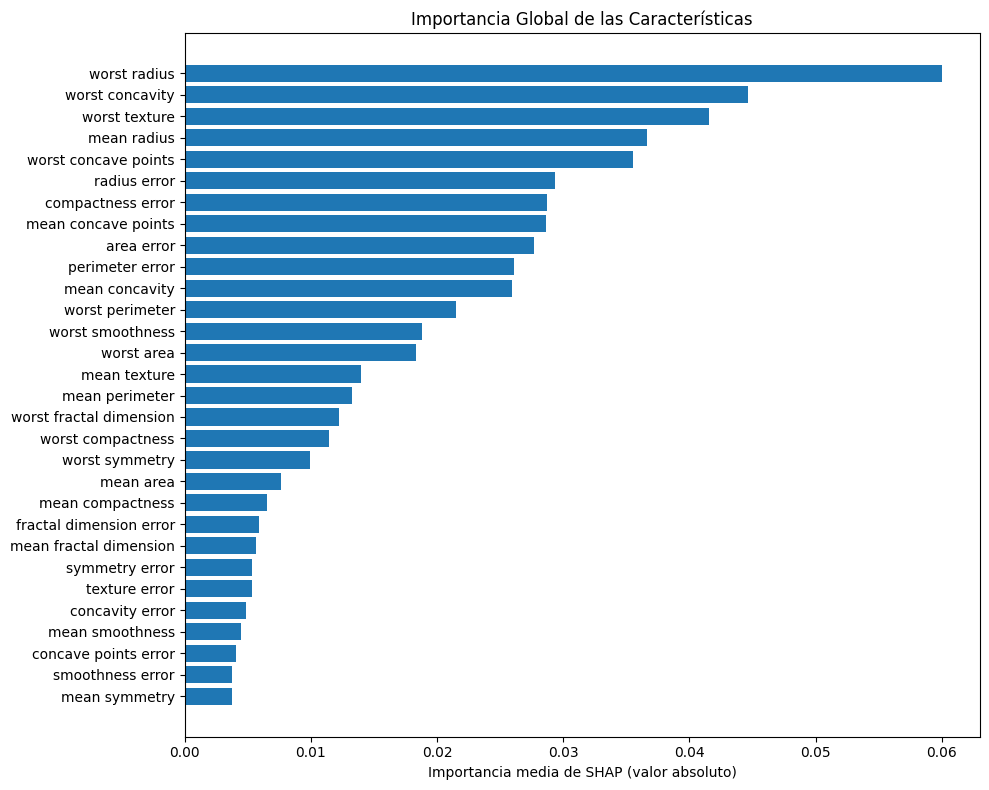

In [22]:
# Los valores deben ser unidimensionales
feature_importance = np.abs(shap_values).mean(0).flatten()

# Crear un DataFrame con las importancias
importance_df = pd.DataFrame({
    'feature': list(X.columns),
    'importance': list(feature_importance)
}).sort_values('importance', ascending=True)

# Crear el gráfico de barras
plt.figure(figsize=(10, 8))
plt.barh(y=importance_df['feature'], width=importance_df['importance'])
plt.xlabel('Importancia media de SHAP (valor absoluto)')
plt.title('Importancia Global de las Características')
plt.tight_layout()
plt.show()

### Observaciones

- **Dominio de `worst radius`, `worst area` y `worst concave points`:** Estas tres características tienen el mayor impacto global en las predicciones del modelo. Esto refuerza lo que vimos con el árbol de decisión: las características que capturan el tamaño (`worst radius`, `worst area`) y la irregularidad de los bordes (`worst concave points`) son determinantes para clasificar tumores malignos.

- **`mean concave points` sigue siendo relevante:** Aunque no lidera el ranking en la red neuronal, sigue siendo una característica importante. Esto muestra una consistencia interesante entre los dos modelos (árbol de decisión y red neuronal).

- **Distribución más equilibrada:** A diferencia del árbol de decisión, donde una o dos características dominaban claramente, la red neuronal distribuye la importancia más equitativamente entre varias features. Esto sugiere que la red está capturando patrones más complejos y combinaciones de características.

- **Características menos importantes:** Features como `texture error`, `mean symmetry` y `mean smoothness` tienen un impacto mucho menor en las predicciones. Estas características probablemente no aportan información significativa para distinguir entre tumores benignos y malignos.

# 4. Comparativa entre modelos: Árboles de decisión vs. Redes neuronales

Ahora que hemos entrenado ambos modelos y explorado su interpretabilidad (con visualización directa para el árbol de decisión y SHAP para la red neuronal), veamos cómo se comparan en distintos aspectos clave.

## 4.1. Previsión vs. Interpretabilidad


| **Aspecto** | **Árbol de Decisión** | **Red Neuronal** |
|---|---|---|
| **Precisión** | ~95% | ~97% |
| **Interpretabilidad** | Alta. Visualización clara del modelo. | Baja. Requiere herramientas como SHAP. |
| **Tiempo de entrenamiento** | Rápido incluso con datos grandes. | Más lento debido a la optimización. |
| **Aplicabilidad** | Ideal para problemas donde **justificar** las predicciones es esencial (e.g., medicina, finanzas). | Ideal cuando la **precisión** es más crítica y se puede invertir en interpretabilidad adicional. |


1. **Precisión:**  
   - La red neuronal alcanza una precisión ligeramente superior (97% vs. 95%). Esta diferencia es pequeña, pero puede ser relevante en aplicaciones donde cada predicción cuenta.  
   - Sin embargo, el árbol de decisión sigue siendo bastante competitivo con un entrenamiento mucho más sencillo.

2. **Interpretabilidad:**  
   - El árbol de decisión es transparente. Podemos visualizar las reglas exactas que el modelo utiliza para clasificar cada muestra. Por ejemplo: *“Si el `mean concave points` es menor a 0.05 y el `worst radius` es menor a 16.83, el tumor es benigno.”*  
   - La red neuronal, en cambio, es una "caja negra" por naturaleza. Para entender sus predicciones necesitamos usar herramientas como SHAP, que aunque útiles, añaden una capa de complejidad que si tenemos muchos datos, en seguida puede volverse tedioso de manejar.

3. **Distribución de la importancia de las características:**  
   - El árbol de decisión identificó rápidamente determinadas features clave, priorizando unas pocas características como `mean concave points` y `worst radius`.  
   - La red neuronal, en cambio, distribuyó la importancia más equilibradamente, capturando relaciones sutiles entre varias features. Esto muestra su capacidad para aprender patrones más complejos.

# 5. Conclusión

En este experimento, hemos explorado brevemente el concepto de interpretabilidad en dos modelos, uno simple y otro más complejo. Hemos aprendido que cada uno tiene un propósito, una aplicación, y una historia que contar sobre cómo toman decisiones (cada uno a su manera).

## ¿Qué aprendimos?

1. **Interpretabilidad: El poder de la claridad**: Un árbol de decisión es como un mapa claro: te muestra paso a paso cómo llegó a una conclusión. En aplicaciones donde necesitas justificar cada decisión, la interpretabilidad es completamente esencial. A veces, entender el "por qué" es tan importante como el resultado mismo, nadie querría un diagnóstico médico sin justificación.

2. **Precisión: La complejidad tiene su lugar**: Las redes neuronales son capaces de capturar patrones complejos y relaciones no lineales entre los datos. Si la prioridad es la precisión (y puedes permitirte invertir en interpretabilidad adicional), una red neuronal será tu herramienta favorita. Pero aquí es donde entra la magia de herramientas como SHAP: incluso las "cajas negras" pueden abrirse y explicarse en cierto modo.

3. **La dualidad entre simplicidad y rendimiento**: Como en la vida, en Machine Learning siempre enfrentamos un tradeoff. ¿Queremos simplicidad y transparencia? ¿O buscamos rendimiento a cualquier costo? La clave está en el contexto. No hay un modelo mejor; hay un modelo adecuado para cada situación.


# Toma de acción para el aprendizaje: La interpretabilidad en tu vida

La interpretabilidad de los modelos no solo nos enseña a entender **cómo** y **por qué** toman decisiones los algoritmos, sino que también nos deja lecciones poderosas sobre la importancia de la claridad, la trazabilidad y la responsabilidad en nuestras propias vidas. Aquí te dejo algunas acciones y reflexiones que puedes llevarte más allá de este notebook.

**1. Sé claro en tus decisiones, construye tu propio árbol de decisión**: Un árbol de decisión es simple y directo: cada paso tiene una razón de ser. Aplícalo a tu vida cuando te enfrentes a decisiones importantes:  
    - **Escribe las preguntas clave:** *¿Qué opciones tengo? ¿Qué consecuencias podrían tener cada una de ellas?*  
    - **Construye las ramas:** Define las acciones y los resultados probables. Visualizar tu “árbol” te dará claridad para elegir el mejor camino.

> *Ejemplo práctico*: Si estás evaluando un cambio de trabajo, pregúntate: *¿Me ofrece crecimiento? ¿Se alinea con mis valores?* Cada respuesta puede llevarte a una decisión final más justificada.

**2. No dependas ciegamente de las "cajas negras"**: En Machine Learning, las redes neuronales pueden darnos respuestas precisas, pero si no entendemos cómo llegan a ellas, corremos el riesgo de confiar ciegamente en algo que no podemos explicar.  
    - **Cuestiona tus propias decisiones y las de otros:** ¿Por qué estoy tomando esta decisión? ¿Qué fundamentos tengo?  
    - **No aceptes "respuestas automáticas":** Ya sea en una reunión, en una conversación o en tu propia mente, si algo suena bien, pero no sabes por qué, prueba a detenerte y pregúntate qué hay detrás.

**3. Evalúa tus "features" clave: ¿Qué es realmente importante?**  
Así como analizamos la importancia de las características en un modelo, identifica cuáles son las **variables clave** que más influyen en tu vida.  
- ¿Qué habilidades, valores o hábitos te acercan a tus objetivos?  
- ¿Qué factores tienen menos impacto y podrías dejar de priorizar?  
> *Ejemplo práctico*: Si tu objetivo es mejorar tu salud, las “features clave” podrían ser tu **dieta**, el **ejercicio** y el **descanso**. Otras variables, como qué zapatillas deportivas usas o qué aplicación usar para medir los macros tendrán menor peso (aunque a veces son las que se llevan la mayor parte de la atención).

**4. Encuentra trazabilidad en tu progreso**: Los modelos interpretables nos permiten entender **cómo** se llegó a un resultado. Haz lo mismo con tus logros y fracasos:  
- **Pregunta siempre “¿por qué?” y “¿cómo llegué aquí?”**  
- Documenta los pasos que te llevaron al éxito o al error. La trazabilidad te ayudará a replicar lo que funciona y ajustar lo que no.  

**5. No sacrifiques claridad por rendimiento**: En Machine Learning, más complejidad no siempre significa mejores resultados. A veces, un modelo simple y transparente es todo lo que necesitas.  
- Aplica esto en tu vida: Simplifica tus sistemas, rutinas y decisiones siempre que sea posible.  
- Pregúntate: *¿Estoy complicando esto innecesariamente?* La simplicidad puede darte más control y menos margen de error.
> "Cuando tienes miedo al éxito, la simplicidad es un lugar reconfortante en el que esconderse" - Frase que le he robado a alguien que no recuerdo.


**6. Alinea tus decisiones con tus valores**: Un modelo optimiza una función objetivo sin preocuparse por los medios, pero tú no eres un modelo: tus métodos importan.  
- Asegúrate de que tus decisiones estén alineadas con lo que realmente valoras, no solo con lo que “optimiza resultados”.  
- Reflexiona sobre el impacto que tienen tus acciones en ti mismo y en los demás.
> *Ejemplo práctico*: Si optimizas tu tiempo de trabajo sacrificando tu descanso y tus relaciones personales, podrías lograr tus metas a corto plazo, pero ¿a qué precio?

**7. Cuestiona, entiende y ajusta**: Interpretar un modelo es un proceso constante: analizamos, entendemos y ajustamos. Haz lo mismo con tu vida:  
- **Cuestiona tus resultados:** Si algo no salió como esperabas, ¿qué puedes aprender?  
- **Ajusta tu enfoque:** Usa lo aprendido para mejorar tus decisiones futuras.  

**8. Recuerda: La verdadera inteligencia es explicable**: Como humanos, no solo queremos respuestas: queremos **entender**. Cuando explicas tus decisiones (a ti mismo o a otros), no solo construyes confianza, también te conviertes en alguien más consciente y estratégico.  

> **Cierre práctico**: Dedica tiempo cada semana a reflexionar sobre tus decisiones importantes. Escríbelas, analízalas y pregúntate:  

- **¿Por qué tomé esta decisión?**  
- **¿Qué aprendí?**  
- **¿Cómo puedo mejorar mi proceso de toma de decisiones la próxima vez?**

## **Reflexión final**  

Al igual que un modelo de Machine Learning, en nuestra vida necesitamos un equilibrio entre **potencia** y **claridad**. La mejor decisión no siempre es la más compleja; es aquella que podemos **explicar, justificar y confiar**.

Asegúrate de entender tus propios modelos de decisión, cuestionar lo que no tiene sentido y siempre, siempre buscar la transparencia en tu camino. Porque la verdadera inteligencia no solo predice el futuro: lo explica y lo hace comprensible.  

Confía, pero cuestiona. Aprende, pero ajusta. Explora, pero entiende. Y construye tus decisiones con la misma claridad y responsabilidad que esperarías de un modelo diseñado para cambiar el mundo. 🚀  

# Recursos


**Datasets**

- [Datasets disponibles en scikit-learn](https://scikit-learn.org/stable/api/sklearn.datasets.html)
- [Breast Cancer Wisconsin Dataset](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_breast_cancer.html)

**Otros recursos**

- [GDPR](https://gdpr-info.eu/)
- [GPT personalizado sobre GDPR](https://chatgpt.com/g/g-JvCAAqPCj-gdpr-expert)

**Artículos**

- [Explora con Propósito. 5 Enfoques para Investigar sin Perderse en el Mar de Información](https://www.manuelespejo.com/posts/Claves-Investigaciones/)

**Libros**

- [Armas de Destrucción Matemática: Cómo el Big Data aumenta la desigualdad y amenaza la democra](https://www.amazon.es/Armas-detrucci%C3%B3n-matem%C3%A1tica-ESPECIALES-Cathy/dp/8494740849) - Un libro muy interesante sobre la interpretabilidad de los modelos y las consecuencias de la falta de transparencia.